**Exercise 2 (30 marks) Scalability**

Since you are now aware of the need for regularization, we will focus only on the regularized problem (2). The
experiments you performed in the last lab would have given the impression that Newton and BFGS methods work
extremely well. However, recall that in the last lab, you performed experiments on a simple 10-dimensional data set.
We will check the behavior of Newton and BFGS methods on large data sets in this exercise.
Beware!! The scalability experiments might impose excessive memory demands. Please carefully watch the memory
usage of Google Colab. Use the following code for the scalability experiments.

Note that in the code fragments, we experiment with different sizes of data set dimensions. Prepare a tabulation
where you report the following quantities for each dimension for Newton and BFGS methods:
1. The total CPU time taken to solve the respective method.
2. The value ∥Ax∗ − y∥22
, where x∗ is the respective optimizer obtained by Newton and BFGS methods.
3. The difference of values ∥x∗ − xorig∥22
where x∗ is the respective optimizer obtained by Newton and BFGS
methods and xorig is used in the code.

Run the experiments until you face either of the following situations (failure):

• If the code is taking more than 30 minutes.

• There is a memory issue.

Report the dimension after which the failure occurs for Newton as well as the BFGS method.

In [ ]:
#Problem 1
import numpy as np
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import time

def fx(x, lambda_reg):
  return 0.5*norm(A@x-y)**2 + 0.5*lambda_reg*np.dot(x,x)

def grad_fx(x, lambda_reg):
  return np.dot(A.transpose(), A)@x - A.transpose()@y + lambda_reg*x

def hessian_fx(lambda_reg):
  return A.transpose()@A + lambda_reg*np.identity(A.shape[1])
def dk_fx(lambda_reg):
  return np.linalg.inv(hessian_fx(lambda_reg))

def get_alpha_newton(xk, alpha0, rho, gamma, Dk, lambda_reg):
  alpha = alpha0
  pk = -grad_fx(xk, lambda_reg)
  while fx(xk + alpha*Dk@pk, lambda_reg) > (fx(xk, lambda_reg) + gamma*alpha*grad_fx(xk, lambda_reg)@Dk@pk):
    alpha = rho*alpha
  return alpha

def newton_method_with_backtracking(x0, tau, alpha0, rho, gamma, lambda_reg):
  xk = np.copy(x0)
  count = 0
  pk = grad_fx(xk, lambda_reg)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    Dk = dk_fx(lambda_reg)
    alpha = get_alpha_newton(xk, alpha0, rho, gamma, Dk, lambda_reg)
    xk = xk - alpha*Dk@pk
    pk = grad_fx(xk, lambda_reg)
    xks.append(xk)
    count += 1
  return count, xk, fx(xk, lambda_reg), xks


lambdaxksbfgs = []
lambdaxksnewton = []
iterationcountlambdabfgs = []
iterationcountlambdanewton = []
timetakenbfgs = []
timetakennewton = []




# Code for Newton method
import numpy as np
import timeit
np.random.seed (10) #for repeatability
N = 200
ds = [1000 , 5000 , 10000 , 20000 , 25000 , 50000 , 100000 , 200000 , 500000 , 1000000]
lambda_reg = 0.001
eps = np. random . randn (N ,1) # random noise
#For each value of dimension in the ds array , we will check the behavior of Newton method
for i in range (np. size (ds)):
  d=ds[i]
  A = np. random . randn (N,d)
  # Normalize the columns
  for j in range (A. shape [1]) :
    A[:,j] = A[:,j]/ np. linalg . norm (A[:,j])
  xorig = np. ones ((d ,1))
  xorig.flatten()

  x0 = np.array([0 for _ in range(d)])
  y = np.dot(A, xorig ) + eps
  y = y.flatten()
  tau = 1e-5
  alpha0 = 0.99
  rho = 0.5
  gamma = 0.5
  start = time.time()
  # call Newton method with A,y, lambda and obtain the optimal solution x_opt
  count, minimizer, minimum, xks = newton_method_with_backtracking(x0, tau, alpha0, rho, gamma, lambda_reg)
  newtontime = time.time() - start # time is in seconds
  print("For d ",d)
  print("Number of iteration is",count,"Minimum value is",minimum,"newton with backtracking")
  print("|| Ax_opt -y ||^2=",norm(A@xorig-y)**2)
  print("|| x_opt -xorig ||^2=",norm(minimizer - xorig.flatten())**2)
  print("Time taken for Newton method is",newtontime)
  # # print the total time and the L2 norm difference || x_opt - xorig || for Newton method

For d  1000
Number of iteration is 4 Minimum value is 0.14183476870809816 newton with backtracking
|| Ax_opt -y ||^2= 477941.4030262053
|| x_opt -xorig ||^2= 826.8244356809709
Time taken for Newton method is 1.0873944759368896
For d  5000
Number of iteration is 4 Minimum value is 0.10576241777383968 newton with backtracking
|| Ax_opt -y ||^2= 2059188.6933381166
|| x_opt -xorig ||^2= 4806.013431133197
Time taken for Newton method is 71.576899766922
For d  10000
Number of iteration is 4 Minimum value is 0.11443640710309748 newton with backtracking
|| Ax_opt -y ||^2= 4469424.705697058
|| x_opt -xorig ||^2= 9780.120415921312
Time taken for Newton method is 409.93584728240967


**Report:** Ram crash for d=20000

In [ ]:
import numpy as np
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import time

def fx(x, lambda_reg):
  return 0.5*norm(A@x-y)**2 + 0.5*lambda_reg*np.dot(x,x)

def grad_fx(x, lambda_reg):
  return np.dot(A.transpose(), A)@x - A.transpose()@y + lambda_reg*x

def hessian_fx(lambda_reg):
  return A.transpose()@A + lambda_reg*np.identity(A.shape[1])
def dk_fx(lambda_reg):
  return np.linalg.inv(hessian_fx(lambda_reg))

def get_alpha_bfgs(xk, alpha0, rho, gamma, Bk, lambda_reg):
  alpha = alpha0
  pk = -grad_fx(xk, lambda_reg)
  while fx(xk + alpha*Bk@pk, lambda_reg) > (fx(xk, lambda_reg) + gamma*alpha*grad_fx(xk, lambda_reg)@Bk@pk):
    alpha = rho*alpha
  return alpha


def bfgs(x0, tau, alpha0, rho, gamma, lambda_reg):
  xk = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = grad_fx(xk, lambda_reg)
  xks = []
  xks.append(xk)
  while (norm(pk)>tau):
    alpha = get_alpha_bfgs(xk, alpha0, rho, gamma, Bk, lambda_reg)
    xnext = xk - alpha*(Bk@pk)
    sk = xnext - xk
    yk = grad_fx(xnext, lambda_reg) - grad_fx(xk, lambda_reg)

    Bk = np.dot((np.eye(len(xk)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(xk)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    xk = xnext
    pk = grad_fx(xk, lambda_reg)
    xks.append(xk)
    count += 1

  return count, xk, fx(xk, lambda_reg), xks
# For bfgs method
import numpy as np
import timeit
np.random.seed (10) #for repeatability
N = 200
ds = [1000 , 5000 , 10000 , 20000 , 25000 , 50000 , 100000 , 200000 , 500000 , 1000000]
lambda_reg = 0.001
eps = np. random . randn (N ,1) # random noise
#For each value of dimension in the ds array , we will check the behavior of Newton method
for i in range (np. size (ds)):
  d=ds[i]
  A = np. random . randn (N,d)
  # Normalize the columns
  for j in range (A. shape [1]) :
    A[:,j] = A[:,j]/ np. linalg . norm (A[:,j])
  xorig = np. ones ((d ,1))
  xorig.flatten()

  x0 = np.array([0 for _ in range(d)])
  y = np.dot(A, xorig ) + eps
  y = y.flatten()
  tau = 1e-5
  alpha0 = 0.99
  rho = 0.5
  gamma = 0.5
  start = timeit . default_timer ()

  # call bfgs method with A,y, lambda and obtain the optimal solution x_opt
  count2, minimizer, minimum, xks2 = bfgs(x0, tau, alpha0, rho, gamma, lambda_reg)
  bfgstime = timeit . default_timer () - start # time is in seconds
  print("For d",d)
  print("Number of iteration is",count2,"Minimum value is",minimum,"bfgs")
  print("|| Ax_opt -y ||^2=",norm(A@xorig-y)**2)
  print("|| x_opt -xorig ||^2=",norm(minimizer - xorig.flatten())**2)
  print("Time taken for bfgs method is",bfgstime)
  # # print the total time and the L2 norm difference || x_opt - xorig || for Newton method

For d 1000
Number of iteration is 32 Minimum value is 0.14183476871428477 bfgs
|| Ax_opt -y ||^2= 477941.4030262053
|| x_opt -xorig ||^2= 826.824435809269
Time taken for bfgs method is 16.072724615998595
For d 5000
Number of iteration is 40 Minimum value is 0.10576241777506894 bfgs
|| Ax_opt -y ||^2= 2059188.6933381166
|| x_opt -xorig ||^2= 4806.0134310008425
Time taken for bfgs method is 881.8743698430007


**Screenshot of runtime where runtime is more than 30 min**

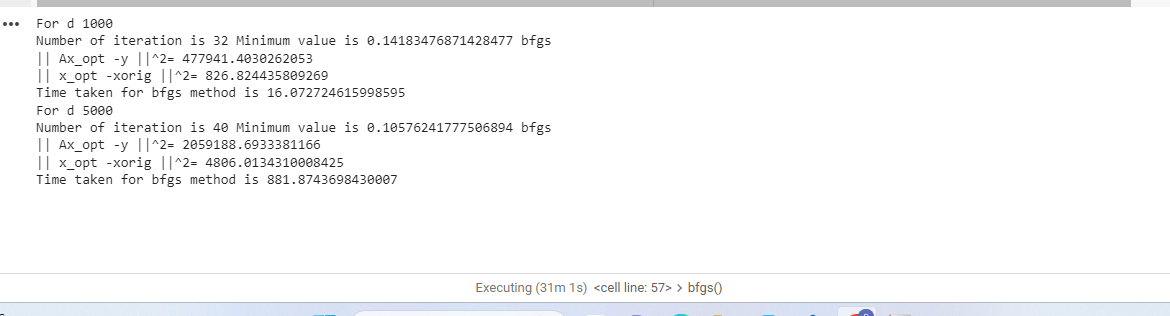